# NBA Statistics 
### <span style="color:#83898b">How are different factors affecting players salaries?</span>

Name: Abdul Wasay Aamir

Student ID: 100874520

The National Basketball Association (NBA) is a worldwide known organization that is watched by billions around the globe. Players have to be highly skilled to play in the NBA as only the best of the best compete against each other to victory. As they are highly skilled they get paid the deserved amount as well. I wanted to explore aspects of players, and how it has an affect on their salaries. NBA players are paid substantial amounts, and discerning the factors that underpin these financial valuations is an interesting puzzle. NBA is known to pay its players the highest salaries out of all sports in the world with average salary being nearly $10 million. NBA keep's statistics on every player and their overall career including their salariesIn this assignment, I am going to explore important factors such as Points Per Game (PTS), Age and Positions of players to determine if these factors play a part in their salaries or not.


![Image of Nba](https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/2013_NBA_Slam_Dunk_Contest_at_Toyota_Center.JPG/600px-2013_NBA_Slam_Dunk_Contest_at_Toyota_Center.JPG)

<p style="font-size: x-small">Francis Godolphin Osbourne Stuart, Public domain, via <a href="https://commons.wikimedia.org/wiki/File:2013_NBA_Slam_Dunk_Contest_at_Toyota_Center.JPG">[Wikimedia Commons]</p>

## Methods
### Data Collection

A subeset of data from NBA 2022-2023 Statistics is maintained publicly at [Kaggle](https://www.kaggle.com/), a free online resource of general datasets

In [1970]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from IPython.display import display

In [1971]:
# Load Data
nba = pd.read_csv('nba_salaries.csv')


# Data Cleaning


This dataset had a extra columns which will not be used so I removed them, I also modified floating point precision for precise printing outputs

In [1972]:
pd.set_option('display.precision', 2)
df = pd.DataFrame(nba)
df = df.drop({'Unnamed: 0' , 'Player-additional'}, axis=1)
df= df.dropna(axis=0)
display(df)


,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,0.92,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,0.68,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,0.66,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,0.77,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,0.92,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Jay Scrubb,49719,SG,22,ORL,2,0,15.0,2.5,3.5,...,0.50,0.0,3.0,3.0,0.5,1.0,0.0,1.5,1.0,6.5
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,0.00,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,1.00,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,1.00,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0


# Analyses


I will explore the relationship between players points per game, age and positions and how they have an affect on the players salaries with exploratory analyses, consisting of statistical summaries and visualisations. 


### Distributions



Firstly, I will show what salaries count as High, Medium and Low salaries in the NBA followed by the first factor that has an affect on salaries


In [1973]:
# Assuming 'nba' is your DataFrame with the relevant data
# Replace the column names with the actual ones in your DataFrame

# Define the salary ranges for each category
salary_bins = [0, 5e6, 10e6, float('inf')]
salary_labels = ['Low', 'Medium', 'High']

# Create a new column 'Salary Category' based on salary ranges
nba['Salary Category'] = pd.cut(nba['Salary'], bins=salary_bins, labels=salary_labels, right=False)

# Display the updated DataFrame with relevant columns
display(nba[['Player Name', 'Salary', 'Salary Category']])

,Player Name,Salary,Salary Category
0,Stephen Curry,48070014,High
1,John Wall,47345760,High
2,Russell Westbrook,47080179,High
3,LeBron James,44474988,High
4,Kevin Durant,44119845,High
...,...,...,...
462,Justin Minaya,35096,Low
463,Kobi Simmons,32795,Low
464,Gabe York,32171,Low
465,RaiQuan Gray,5849,Low


Points Per Game definetly has an affect on salaries. I will explore in depth how that is by first showing the avg ppg then max and min 

## Points Per Game

In [1974]:
ds = nba.PTS.describe()
display(f"Mean Points Per Game: {round(ds['mean'],2)}")
display(f"Max Points Per Game: {round(ds['max'],2)}")
display(f"Min Points Per Game: {round(ds['min'],2)*12}")

'Mean Points Per Game: 9.13'

'Max Points Per Game: 33.1'

'Min Points Per Game: 0.0'

Different positions get different amount of points based on their skills. Below the graph displays how Shooting Guards score the most ppg on avg than the rest. We will see if this has a affect on salaries as well.

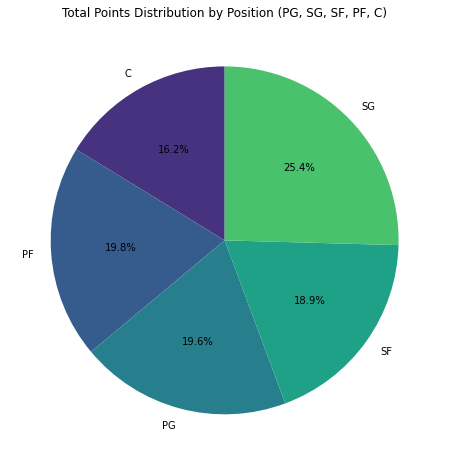

In [1975]:
selected_positions = ['PG', 'SG', 'SF', 'PF', 'C']
filtered_data = nba[nba['Position'].isin(selected_positions)]

# Create a pie chart for total points by position
total_pts_by_position = filtered_data.groupby('Position')['PTS'].sum()

plt.figure(figsize=(8, 8),facecolor='white')
plt.pie(total_pts_by_position, labels=total_pts_by_position.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Total Points Distribution by Position (PG, SG, SF, PF, C)')
plt.show()

## Points Per Game and Salary

Below the graph shows a clear cut pattern between salary and ppg. As points per game increase the salary also increases

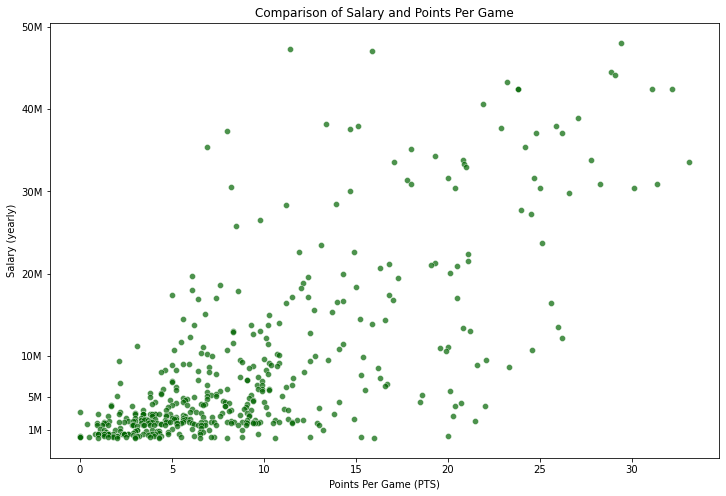

In [1976]:
plt.figure(figsize=(12, 8))

# Create a scatter plot for salary vs. points per game (PTS)
sns.scatterplot(x='PTS', y='Salary', data=nba, color='darkgreen', alpha=0.7)

# Set y-axis ticks with appropriate increments
yticks = [1000000, 5000000, 10000000, 20000000, 30000000, 40000000, 50000000]
yticklabels = ['1M', '5M', '10M', '20M', '30M', '40M', '50M']

plt.yticks(yticks, labels=yticklabels)

# Set plot labels and title
plt.title('Comparison of Salary and Points Per Game')
plt.xlabel('Points Per Game (PTS)')
plt.ylabel('Salary (yearly)')

# Show the plot
plt.show()

The table below also shows the same pattern with a few outliers here and there.

In [1977]:
df = (nba[['Salary' , 'PTS']])
display(df)

,Salary,PTS
0,48070014,29.4
1,47345760,11.4
2,47080179,15.9
3,44474988,28.9
4,44119845,29.1
...,...,...
462,35096,4.3
463,32795,1.0
464,32171,8.0
465,5849,16.0


This suggests that Points Per Game does have an affect on Salary

## Age

A descriptive analysis of different ages in the league. As you can tell, after there's a big decline after 26-30

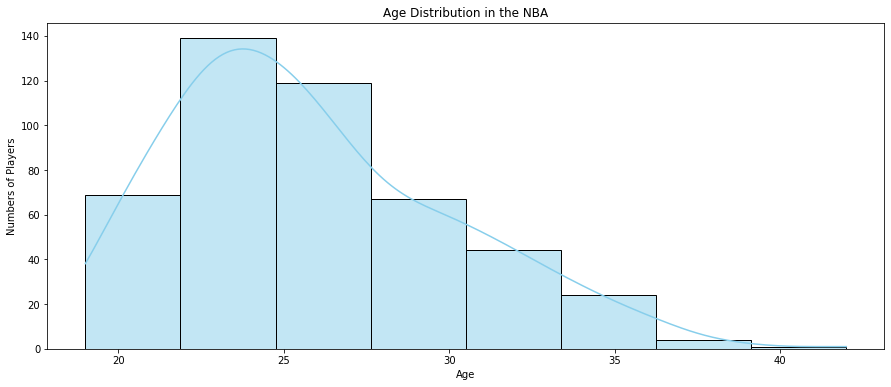

In [1978]:
plt.figure(figsize=(15, 6))
sns.histplot(data=nba, x='Age', bins=8, kde=True, color='skyblue')

plt.title('Age Distribution in the NBA')
plt.xlabel('Age')
plt.ylabel('Numbers of Players')
plt.show()

I will show this in a table as well so we get a better understanding 

In [1979]:
bins = [20, 25, 30, 35, 40, 45]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45']

# Add a new column 'Age Group' to the DataFrame
nba['Age Group'] = pd.cut(nba['Age'], bins=bins, labels=labels, right=False)

# Count the number of players in each age group
age_distribution_table = pd.value_counts(nba['Age Group']).reset_index()
age_distribution_table.columns = ['Age Group', 'Number of Players']

# Sort the table by age group
age_distribution_table = age_distribution_table.sort_values(by='Age Group')

# Display the table
display(age_distribution_table)

,Age Group,Number of Players
0,20-25,196
1,26-30,163
2,31-35,79
3,36-40,16
4,41-45,1


## Age and Salary

Graph below shows that as age increases salary increases as well, but it is not a extremely strong relationship as the correlation coefficient is 0.42 so in some cases there might not be a salary increase of a significant amount. 

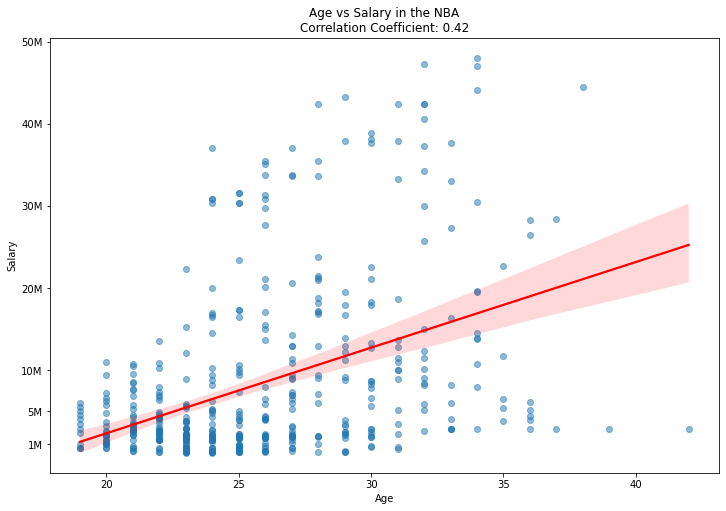

In [1980]:
correlation_coefficient = nba['Age'].corr(nba['Salary'])

# Create a scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='Age', y='Salary', data=nba, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

#Set y-axis ticks with appropriate increments
yticks = [1000000, 5000000, 10000000, 20000000, 30000000, 40000000, 50000000]
yticklabels = ['1M', '5M', '10M', '20M', '30M', '40M', '50M']

plt.yticks(yticks, labels=yticklabels)


plt.title(f'Age vs Salary in the NBA\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

As seen in the table below as well, some young players get paid more and some old players get paid more as well.

In [1981]:
df = (nba[['Salary' , 'Age']])
display(df)

,Salary,Age
0,48070014,34
1,47345760,32
2,47080179,34
3,44474988,38
4,44119845,34
...,...,...
462,35096,23
463,32795,25
464,32171,29
465,5849,23


There is a relationship between age and salary but again like it was mentioned it's not a very strong one. 

## Positions

Everyone in the nba are assigned a position on the team, we are going to look at how many players are in each position. From the looks of it in the graph below, most players play the position of shooting guard (SG)

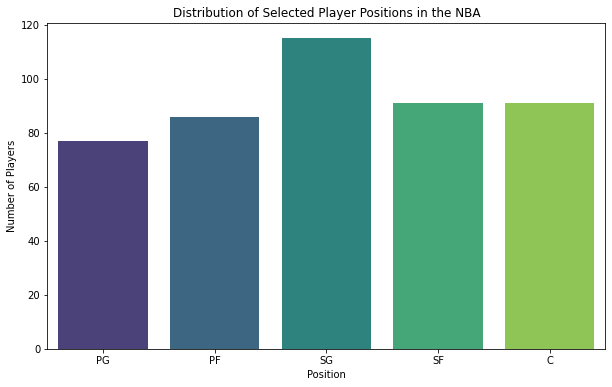

In [1982]:
selected_positions = ['PG', 'SG', 'PF', 'C', 'SF']
filtered_data = nba[nba['Position'].isin(selected_positions)]

# Create a bar plot for the distribution of selected player positions
plt.figure(figsize=(10, 6))
sns.countplot(x='Position', data=filtered_data, palette='viridis')

plt.title('Distribution of Selected Player Positions in the NBA')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()

The table below confirms this as well

In [1983]:
selected_positions = ['PG', 'SG', 'PF', 'C', 'SF']
filtered_data = nba[nba['Position'].isin(selected_positions)]

# Group by position and count the number of players
position_distribution_table = filtered_data.groupby('Position').size().reset_index(name='Number of Players')

# Display the table
display(position_distribution_table)

,Position,Number of Players
0,C,91
1,PF,86
2,PG,77
3,SF,91
4,SG,115


## Positions and Salary

Table below shows the average, max and min salary based on position in the nba. As you can tell points guards make the most money based on their avg salary. 

In [1984]:
selected_positions = ['PG', 'SG', 'SF', 'PF', 'C']
filtered_data = nba[nba['Position'].isin(selected_positions)]

# Group by position and select mean, min, and max for salaries
df = filtered_data.groupby('Position')['Salary'].agg(['mean', 'min', 'max'])

# Custom formatting function for displaying values in full form as whole numbers
def format_full_form(x):
    return f"{int(x):,}"  # Format as whole number with commas for thousands

# Apply the formatting function to the 'mean', 'min', and 'max' columns
df[['mean', 'min', 'max']] = df[['mean', 'min', 'max']].applymap(format_full_form)

# Display the table
display(df)

,mean,min,max
Position,,,
C,"7,282,722","116,986","38,172,414"
PF,"8,885,045","5,849","44,474,988"
PG,"11,579,573","5,849","48,070,014"
SF,"8,132,252","35,096","42,492,492"
SG,"6,681,301","32,171","43,279,250"


For a better visualization, there is a graph down below that showcases this.

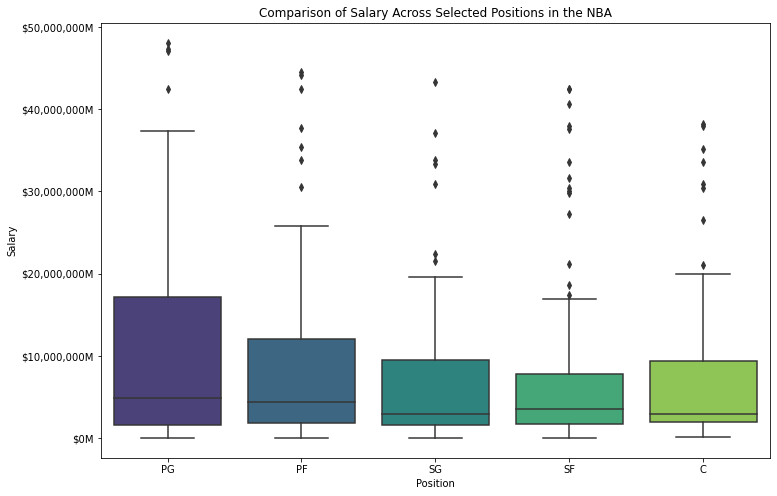

In [1985]:
selected_positions = ['PG', 'SG', 'SF', 'PF', 'C']
filtered_data = nba[nba['Position'].isin(selected_positions)]

# Create a box plot to compare salaries across selected positions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Salary', data=filtered_data, palette='viridis')

# Format y-axis ticks to show values in millions
formatter = ticker.StrMethodFormatter('${x:,.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Comparison of Salary Across Selected Positions in the NBA')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

This suggests that Positions played by players does affect their salaries based on the graph and table

# Discussion

In this assignment, I explored data from the NBA 2022-2023 Statistics, and focused on relationships between players Points Per Game, Age and Positions on their salaries. An exploratory analysis supported the hypotheses that both factors, Points Per Game and Positions are related to Salary with Age having a moderate relationship, not as strong as the other two factors. I found that players who have higher points per game tend to get higher salaries which was shown in the graphs and table having a direct affect on salary. Age did show to have an affect on salary as well but wasn't a very strong relationship. As some younger NBA players were getting paid more or equal amount as some of the older NBA players, for example Stephen Curry age 34 is getting paid a higher amount than 38 year old Lebron James. Overall, there was a moderate relationship in age as with age and experience that graph showed there was an increase in salary at the least. Lastly, positions played by players in the nba seem to show an affect in salaries as well. The table showed that Point Guards (PG) get a higher average salary than any other position followed by a graph showcasing that the highest-paid NBA player is a point guard as well. 

# References

1. Source Data - https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz
5. Pie Chart source - https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#pie-charts
6. Boxplot source - https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#boxplots
7. Histplot source - https://seaborn.pydata.org/generated/seaborn.histplot.html
7. Ticker source - https://stackoverflow.com/questions/44187290/matplotlib-ticker
8. Ytickers source - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html
9. Custom fortmatting source - https://jupyterbook.org/en/stable/content/code-outputs.html
10. Pandas apply map source - https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff
11. Correlation Coefficient source - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html 
13. Float source - https://stackoverflow.com/questions/34264710/what-is-the-point-of-floatinf-in-python

